<a href="https://colab.research.google.com/github/DenisDorokhov1/Course_paper/blob/main/The_whole_model_with_LIME_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

hund_mil_df = pd.read_csv("/content/dataset_scaled_boxoffice_100_mil.csv")

In [2]:
hund_mil_df[['budget (100 mil)', 'revenue (100 mil)']].describe()

,budget (100 mil),revenue (100 mil)
count,4601.000000,4601.000000
mean,0.272163,0.737837
std,0.259173,0.847451
min,0.010000,0.008984
25%,0.080000,0.143117
50%,0.198000,0.406000
75%,0.370000,1.017021
max,1.300000,4.242088


In [3]:
hund_mil_df.columns.tolist()

['Unnamed: 0',
 'id',
 'title',
 'overview',
 'popularity',
 'vote_average',
 'vote_count',
 'budget',
 'revenue',
 'Joy',
 'Sadness',
 'Anticipation',
 'Surprise',
 'Fear',
 'Anger',
 'Trust',
 'Disgust',
 'clean_overview',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'Joy_num',
 'Sadness_num',
 'Anticipation_num',
 'Surprise_num',
 'Fear_num',
 'Anger_num',
 'Trust_num',
 'Disgust_num',
 'overview_clean',
 'accident',
 'accidentally',
 'across',
 'act',
 'action',
 'adventure',
 'affair',
 'age',
 'agent',
 'alien',
 'alone',
 'along',
 'also',
 'always',
 'america',
 'american',
 'ancient',
 'angeles',
 'another',
 'apartment',
 'arm',
 'army',
 'around',
 'arrive',
 'art',
 'assassin',
 'attack',
 'attempt',
 'away',
 'baby',
 'back',
 'bad',
 'band',
 'bank',
 'base',
 'battle',
 'bear',
 'beautiful',
 'become',
 'becomes',
 'begin',
 'behind',
 'believe',
 'best',
 'big',
 'black',
 'body',


исключение языка

In [4]:
lang_features = [col for col in hund_mil_df.columns if col.startswith("lang_")]
print(lang_features)

['lang_ar', 'lang_bs', 'lang_cn', 'lang_da', 'lang_de', 'lang_en', 'lang_es', 'lang_fa', 'lang_fi', 'lang_fr', 'lang_gl', 'lang_hi', 'lang_hu', 'lang_id', 'lang_is', 'lang_it', 'lang_ja', 'lang_ko', 'lang_la', 'lang_lv', 'lang_nl', 'lang_no', 'lang_pl', 'lang_pt', 'lang_ru', 'lang_sv', 'lang_te', 'lang_th', 'lang_tn', 'lang_tr', 'lang_uk', 'lang_zh']


In [5]:
exclude_cols = [
    'Unnamed: 0', 'id', 'title', 'overview', 'clean_overview',
    'budget', 'revenue', 'overview_clean', "budget (Millions)", 'revenue (Millions)',
'Joy', 'Sadness', 'Anticipation', 'Surprise', 'Fear',
    'Anger', 'Trust', 'Disgust',
     'accident',
 'accidentally',
 'across',
 'act',
 'action',
 'adventure',
 'affair',
 'age',
 'agent',
 'alien',
 'alone',
 'along',
 'also',
 'always',
 'america',
 'american',
 'ancient',
 'angeles',
 'another',
 'apartment',
 'arm',
 'army',
 'around',
 'arrive',
 'art',
 'assassin',
 'attack',
 'attempt',
 'away',
 'baby',
 'back',
 'bad',
 'band',
 'bank',
 'base',
 'battle',
 'bear',
 'beautiful',
 'become',
 'becomes',
 'begin',
 'behind',
 'believe',
 'best',
 'big',
 'black',
 'body',
 'bond',
 'book',
 'bos',
 'boy',
 'boyfriend',
 'break',
 'bring',
 'british',
 'brother',
 'build',
 'business',
 'call',
 'cant',
 'captain',
 'capture',
 'car',
 'career',
 'case',
 'catch',
 'cause',
 'century',
 'challenge',
 'chance',
 'change',
 'child',
 'childhood',
 'christmas',
 'cia',
 'city',
 'claim',
 'close',
 'coach',
 'college',
 'come',
 'community',
 'company',
 'confront',
 'control',
 'cop',
 'corrupt',
 'could',
 'country',
 'couple',
 'crash',
 'create',
 'creature',
 'crew',
 'crime',
 'criminal',
 'dangerous',
 'dark',
 'date',
 'daughter',
 'david',
 'day',
 'dead',
 'deadly',
 'deal',
 'death',
 'decide',
 'decides',
 'deep',
 'desert',
 'desperate',
 'despite',
 'destroy',
 'detective',
 'determine',
 'develop',
 'die',
 'different',
 'discover',
 'discovers',
 'doctor',
 'doesnt',
 'dog',
 'dr',
 'draw',
 'dream',
 'drive',
 'drug',
 'earth',
 'embark',
 'encounter',
 'end',
 'enemy',
 'england',
 'entire',
 'escape',
 'even',
 'event',
 'eventually',
 'ever',
 'every',
 'everyone',
 'everything',
 'evil',
 'experience',
 'eye',
 'face',
 'fall',
 'family',
 'far',
 'fate',
 'father',
 'fbi',
 'fear',
 'fellow',
 'female',
 'fight',
 'figure',
 'film',
 'finally',
 'find',
 'first',
 'five',
 'fly',
 'follow',
 'force',
 'forever',
 'form',
 'former',
 'four',
 'france',
 'frank',
 'free',
 'french',
 'friend',
 'friends',
 'friendship',
 'full',
 'future',
 'game',
 'gang',
 'get',
 'girl',
 'girlfriend',
 'give',
 'go',
 'good',
 'government',
 'great',
 'group',
 'grow',
 'guy',
 'hand',
 'happen',
 'haunt',
 'he',
 'head',
 'heart',
 'heist',
 'help',
 'hero',
 'hide',
 'high',
 'hire',
 'history',
 'hit',
 'hold',
 'hollywood',
 'home',
 'hop',
 'hope',
 'house',
 'however',
 'human',
 'hunt',
 'hunter',
 'husband',
 'identity',
 'ii',
 'include',
 'inside',
 'investigate',
 'involve',
 'island',
 'jack',
 'james',
 'job',
 'john',
 'join',
 'journey',
 'keep',
 'kid',
 'kidnap',
 'kill',
 'killer',
 'king',
 'know',
 'la',
 'land',
 'last',
 'late',
 'later',
 'law',
 'lawyer',
 'lead',
 'leader',
 'learn',
 'leave',
 'legendary',
 'lie',
 'life',
 'like',
 'line',
 'little',
 'live',
 'local',
 'london',
 'long',
 'look',
 'lord',
 'los',
 'lose',
 'love',
 'lover',
 'make',
 'man',
 'many',
 'marriage',
 'marry',
 'master',
 'may',
 'mean',
 'meet',
 'member',
 'memory',
 'men',
 'michael',
 'middle',
 'might',
 'military',
 'million',
 'miss',
 'mission',
 'money',
 'monster',
 'mother',
 'move',
 'movie',
 'mr',
 'much',
 'murder',
 'music',
 'must',
 'mysterious',
 'mystery',
 'name',
 'need',
 'neighbor',
 'never',
 'new',
 'next',
 'nick',
 'night',
 'nightmare',
 'nothing',
 'officer',
 'old',
 'one',
 'open',
 'order',
 'others',
 'owner',
 'pair',
 'parent',
 'paris',
 'part',
 'partner',
 'party',
 'past',
 'path',
 'paul',
 'people',
 'perfect',
 'personal',
 'place',
 'plan',
 'planet',
 'play',
 'player',
 'plot',
 'police',
 'popular',
 'power',
 'powerful',
 'president',
 'prison',
 'problem',
 'professor',
 'protect',
 'prove',
 'put',
 'queen',
 'quest',
 'question',
 'quickly',
 'race',
 'raise',
 'real',
 'reality',
 'realize',
 'receive',
 'recruit',
 'relationship',
 'release',
 'reporter',
 'rescue',
 'result',
 'return',
 'reunite',
 'revenge',
 'right',
 'rise',
 'road',
 'rock',
 'romance',
 'romantic',
 'rule',
 'run',
 'russian',
 'ruthless',
 'save',
 'school',
 'scientist',
 'search',
 'secret',
 'security',
 'see',
 'seek',
 'seem',
 'seemingly',
 'send',
 'serial',
 'series',
 'set',
 'shes',
 'ship',
 'show',
 'side',
 'since',
 'single',
 'sinister',
 'sister',
 'skill',
 'small',
 'soldier',
 'solve',
 'something',
 'son',
 'soon',
 'south',
 'space',
 'spend',
 'spirit',
 'stand',
 'star',
 'start',
 'state',
 'stay',
 'steal',
 'still',
 'stop',
 'story',
 'strange',
 'stranger',
 'street',
 'strike',
 'struggle',
 'student',
 'successful',
 'suddenly',
 'summer',
 'supernatural',
 'survive',
 'survivor',
 'suspect',
 'take',
 'tale',
 'target',
 'task',
 'teacher',
 'team',
 'teen',
 'teenage',
 'teenager',
 'tell',
 'terrify',
 'terrorist',
 'test',
 'thief',
 'thing',
 'think',
 'though',
 'threaten',
 'three',
 'time',
 'together',
 'top',
 'town',
 'track',
 'train',
 'trap',
 'travel',
 'trip',
 'trouble',
 'true',
 'truth',
 'try',
 'turn',
 'two',
 'uncle',
 'uncover',
 'unexpected',
 'unlikely',
 'upon',
 'use',
 'vacation',
 'vampire',
 'veteran',
 'victim',
 'village',
 'violent',
 'visit',
 'want',
 'war',
 'warrior',
 'way',
 'wealthy',
 'weapon',
 'wed',
 'well',
 'white',
 'who',
 'whose',
 'wife',
 'wild',
 'win',
 'within',
 'without',
 'witness',
 'woman',
 'work',
 'world',
 'would',
 'write',
 'writer',
 'wrong',
 'year',
 'yet',
 'york',
 'young',
#   'Topic_1',
#  'Topic_2',
#  'Topic_3',
#  'Topic_4',
#  'Topic_5',
#  'Topic_6',
#  'Topic_7',
#  'Topic_8',
#  'Topic_9',
#  'Topic_10',
#  'Topic_11',
    'Joy_num',
 'Sadness_num',
 'Anticipation_num',
 'Surprise_num',
 'Fear_num',
 'Anger_num',
 'Trust_num',
 'Disgust_num',
]

for i_lang in lang_features:
  exclude_cols.append(i_lang)

target = 'revenue (100 mil)'

features = [col for col in hund_mil_df.columns if col not in exclude_cols + [target]]

missing_cols = [col for col in features + [target] if col not in hund_mil_df.columns]

In [6]:
features

['popularity',
 'vote_average',
 'vote_count',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'runtime',
 'release_year',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Comedy',
 'genre_Crime',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Mystery',
 'genre_Romance',
 'genre_Science Fiction',
 'genre_TV Movie',
 'genre_Thriller',
 'genre_War',
 'genre_Western',
 'budget (100 mil)']

In [7]:
import numpy as np
# Gets movie details (budget and fees) by movie ID from TMDB.
# Returns a dictionary with 'budget' and 'revenue' or None in case of an error or missing data.
for col in features + [target]:
    hund_mil_df[col] = pd.to_numeric(hund_mil_df[col], errors='coerce').fillna(0)

# Removing the noise by budget and revenuee
initial_rows = hund_mil_df.shape[0]
df_cleaned = hund_mil_df[(hund_mil_df['budget (100 mil)'] > 0) & (hund_mil_df['revenue (100 mil)'] > 0)].copy()

budget_upper_bound = np.percentile(df_cleaned['budget (100 mil)'], 95)
revenue_upper_bound = np.percentile(df_cleaned['revenue (100 mil)'], 95)

df_cleaned = df_cleaned[
    (df_cleaned['budget (100 mil)'] <= budget_upper_bound) &
    (df_cleaned['revenue (100 mil)'] <= revenue_upper_bound)
].copy()

print(f"Size after deleating  noisy data: {df_cleaned.shape} (было {initial_rows})")

Size after deleating  noisy data: (4235, 594) (было 4602)


In [ ]:
df_cleaned.columns.tolist()

['Unnamed: 0',
 'id',
 'title',
 'overview',
 'popularity',
 'vote_average',
 'vote_count',
 'budget',
 'revenue',
 'Joy',
 'Sadness',
 'Anticipation',
 'Surprise',
 'Fear',
 'Anger',
 'Trust',
 'Disgust',
 'clean_overview',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'Joy_num',
 'Sadness_num',
 'Anticipation_num',
 'Surprise_num',
 'Fear_num',
 'Anger_num',
 'Trust_num',
 'Disgust_num',
 'overview_clean',
 'accident',
 'accidentally',
 'across',
 'act',
 'action',
 'adventure',
 'affair',
 'age',
 'agent',
 'alien',
 'alone',
 'along',
 'also',
 'always',
 'america',
 'american',
 'ancient',
 'angeles',
 'another',
 'apartment',
 'arm',
 'army',
 'around',
 'arrive',
 'art',
 'assassin',
 'attack',
 'attempt',
 'away',
 'baby',
 'back',
 'bad',
 'band',
 'bank',
 'base',
 'battle',
 'bear',
 'beautiful',
 'become',
 'becomes',
 'begin',
 'behind',
 'believe',
 'best',
 'big',
 'black',
 'body',


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_cleaned[features]
y = df_cleaned[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"- X_train: {X_train_scaled.shape}")
print(f"- X_test: {X_test_scaled.shape}")
print(f"- y_train: {y_train.shape}")
print(f"- y_test: {y_test.shape}")

- X_train: (3388, 35)
- X_test: (847, 35)
- y_train: (3388,)
- y_test: (847,)


In [ ]:
X.columns.tolist()

['popularity',
 'vote_average',
 'vote_count',
 'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
 'runtime',
 'release_year',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Comedy',
 'genre_Crime',
 'genre_Drama',
 'genre_Family',
 'genre_Fantasy',
 'genre_History',
 'genre_Horror',
 'genre_Music',
 'genre_Mystery',
 'genre_Romance',
 'genre_Science Fiction',
 'genre_TV Movie',
 'genre_Thriller',
 'genre_War',
 'genre_Western',
 'budget (100 mil)']

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = RandomForestRegressor(
    n_estimators=1000,
    random_state=50,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_jobs=-1,
    max_features=0.5,
    bootstrap=True
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"MAE: {mae:.2f}")

Mean Squared Error (MSE): 0.17
MAE: 0.30


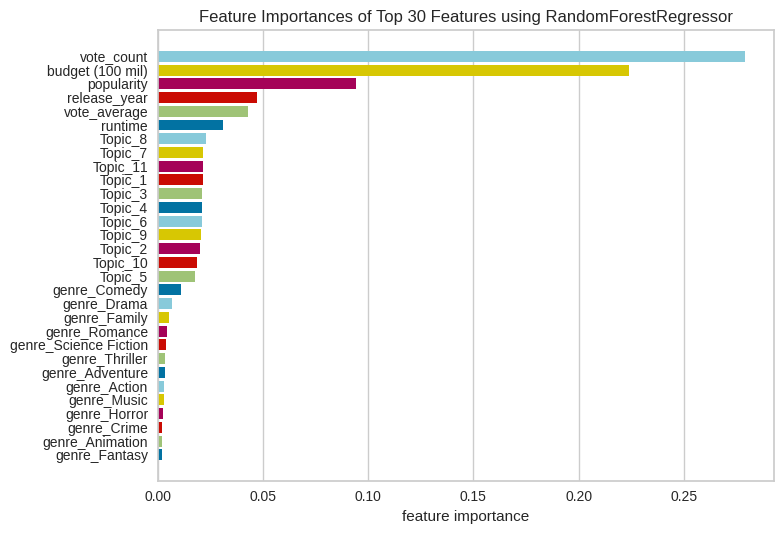

<Axes: title={'center': 'Feature Importances of Top 30 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [10]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model, topn=30, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(
    max_iter=3000,
    learning_rate=0.03,
    max_depth=12,
    l2_regularization=0.5,
    early_stopping=True,
    random_state=42,
    min_samples_leaf=50,
    max_leaf_nodes=128
)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAE: 0.29
MSE: 0.17


In [ ]:
pip install lime

Передаю конкретный список фичей для уточнения их роли в анализе

In [ ]:
selected_features = [
        'Topic_1',
 'Topic_2',
 'Topic_3',
 'Topic_4',
 'Topic_5',
 'Topic_6',
 'Topic_7',
 'Topic_8',
 'Topic_9',
 'Topic_10',
 'Topic_11',
    # 'Joy_num',
#  'Sadness_num',
#  'Anticipation_num',
#  'Surprise_num',
#  'Fear_num',
#  'Anger_num',
#  'Trust_num',
#  'Disgust_num',
#   'genre_Action',
#  'genre_Adventure',
#  'genre_Animation',
#  'genre_Comedy',
#  'genre_Crime',
#  'genre_Drama',
#  'genre_Family',
#  'genre_Fantasy',
#  'genre_History',
#  'genre_Horror',
#  'genre_Music',
#  'genre_Mystery',
#  'genre_Romance',
#  'genre_Science Fiction',
#  'genre_TV Movie',
#  'genre_Thriller',
#  'genre_War',
#  'genre_Western',
]


In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

random_indices = random.sample(range(X_test_scaled.shape[0]), 100)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True)


for i, idx in enumerate(random_indices, 1):
    instance = X_test_scaled[idx]
    actual = y_test.iloc[idx]
    predicted = model.predict([instance])[0]


    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    print(f"\nFilm name [{i}] {df_cleaned.loc[y_test.index[idx]]['title']}")

    for feat_name, weight in exp.as_list():
        if any(sel_feat in feat_name for sel_feat in selected_features):
            print(f"     {feat_name}: {weight:.3f}")


  [1] Hit Man
   Imporatance of features:
     genre_Family <= -0.32: -0.061
     -0.76 < genre_Comedy <= 1.31: 0.054
     genre_Animation <= -0.22: -0.052
     genre_TV Movie <= -0.02: 0.033
     genre_Romance > -0.49: 0.027
     genre_Music <= -0.18: 0.026
     genre_Science Fiction <= -0.34: 0.023
     genre_Horror <= -0.42: -0.022
     genre_Adventure <= -0.43: -0.019
     genre_History <= -0.25: 0.018
     genre_War <= -0.19: 0.017
     -0.75 < Joy_num <= -0.25: -0.015
     genre_Drama <= -0.96: 0.015
     genre_Western <= -0.13: 0.012
     genre_Mystery <= -0.34: -0.011
     genre_Fantasy <= -0.33: 0.010
     genre_Crime > -0.48: 0.005
     genre_Action <= -0.54: -0.004
     genre_Thriller <= -0.65: -0.000

  [2] Three Thousand Years of Longing
   Imporatance of features:
     genre_Family <= -0.32: -0.072
     genre_Comedy <= -0.76: -0.060
     genre_TV Movie <= -0.02: 0.058
     genre_History <= -0.25: -0.050
     genre_Music <= -0.18: -0.047
     genre_War <= -0.19: -0.034
  

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

random_indices = random.sample(range(X_test_scaled.shape[0]), 100)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


for i, idx in enumerate(random_indices, 1):
    instance = X_test_scaled[idx]

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    for feat_name, weight in exp.as_list():
        if "Anger_num" in feat_name and weight > 0:
            print(f"[{i}] {df_cleaned.loc[y_test.index[idx]]['title']}")
            for f_name, f_weight in exp.as_list():
                print(f"     {f_name}: {f_weight:.3f}")
            break



📌 Фильмы, где 'Anger_num' положительно влияет на предсказание кассы:

[2] Once Upon a Time in the West
     vote_count > 0.17: 0.522
     budget (100 mil) <= -0.79: -0.291
     popularity > 0.13: 0.109
     release_year <= -0.13: 0.100
     genre_Family <= -0.32: -0.076
     genre_Comedy <= -0.76: -0.043
     vote_average > 0.69: -0.035
     genre_Animation <= -0.22: -0.028
     Joy_num > 0.75: 0.024
     runtime > 0.48: 0.023
     genre_Romance <= -0.49: -0.023
     -0.40 < Topic_7 <= -0.38: -0.019
     genre_Science Fiction <= -0.34: 0.016
     genre_Western > -0.13: -0.016
     -0.47 < Topic_8 <= -0.45: -0.014
     -0.96 < genre_Drama <= 1.04: -0.011
     Topic_6 > -0.41: -0.010
     genre_Mystery <= -0.34: 0.010
     -0.02 < Trust_num <= 1.11: -0.010
     -0.39 < Topic_10 <= -0.38: -0.010
     Anticipation_num > 0.58: 0.010
     -0.38 < Topic_9 <= -0.36: -0.009
     -0.44 < Topic_4 <= -0.41: -0.009
     Surprise_num <= -0.48: -0.008
     genre_Fantasy <= -0.33: -0.008
     -0.36 <

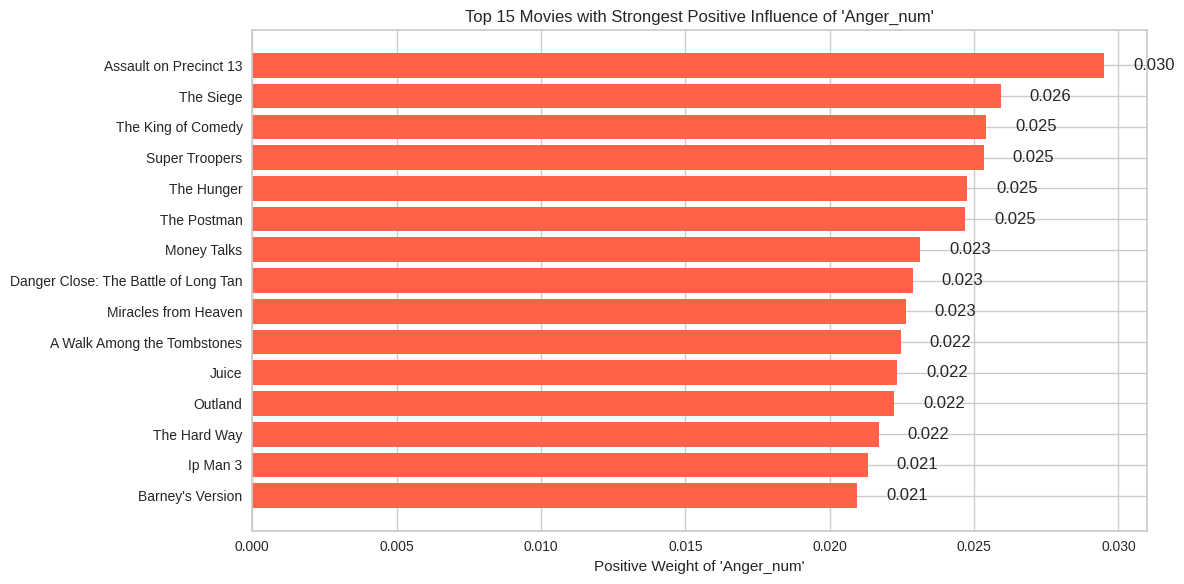

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer


random_indices = random.sample(range(X_test_scaled.shape[0]), 700)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)

anger_positive_movies = []

for idx in random_indices:
    instance = X_test_scaled[idx]

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    for feat_name, weight in exp.as_list():
        if "Anger_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            anger_positive_movies.append({
                'title': title,
                'anger_weight': weight
            })
            break


anger_positive_movies.sort(key=lambda x: x['anger_weight'], reverse=True)

top_n = 15
top_movies = anger_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['anger_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'Anger_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'Anger_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()


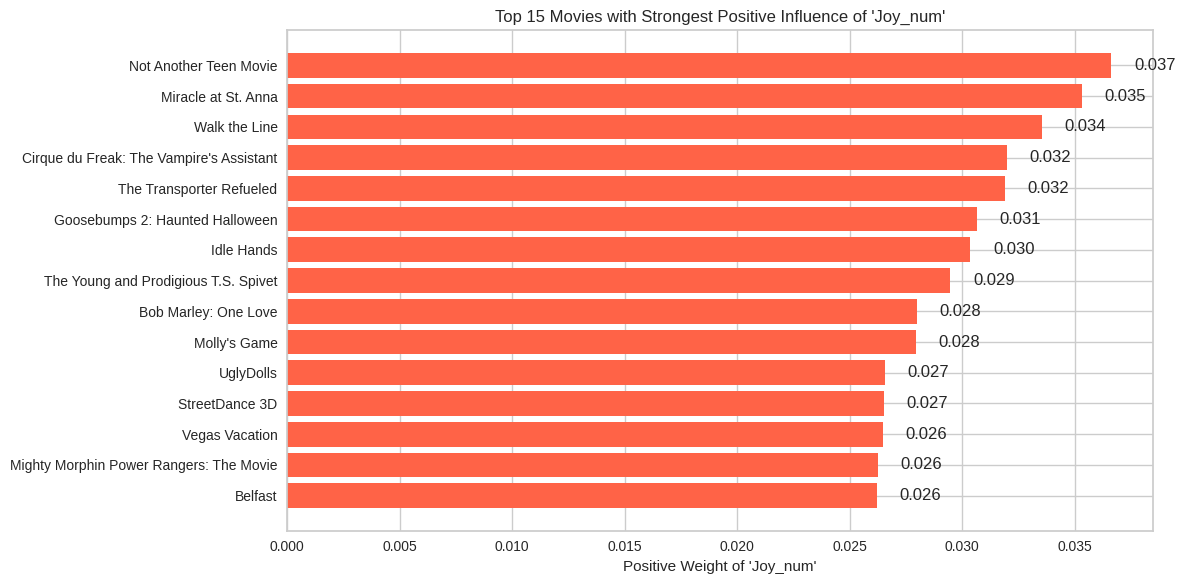

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer


random_indices = random.sample(range(X_test_scaled.shape[0]), 500)


explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


joy_positive_movies = []


for idx in random_indices:
    instance = X_test_scaled[idx]

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )


    for feat_name, weight in exp.as_list():
        if "Joy_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            joy_positive_movies.append({
                'title': title,
                'joy_weight': weight
            })
            break

joy_positive_movies.sort(key=lambda x: x['joy_weight'], reverse=True)

top_n = 15
top_movies = joy_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['joy_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'Joy_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'Joy_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

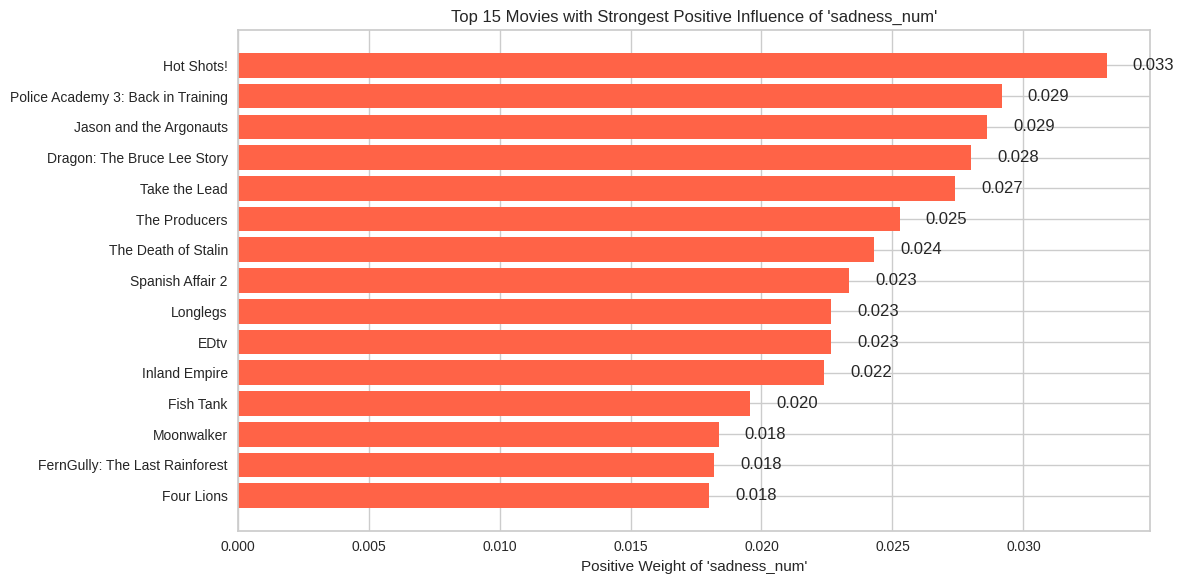

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

random_indices = random.sample(range(X_test_scaled.shape[0]), 500)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


sadness_positive_movies = []

for idx in random_indices:
    instance = X_test_scaled[idx]

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    for feat_name, weight in exp.as_list():
        if "Sadness_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            sadness_positive_movies.append({
                'title': title,
                'sadness_weight': weight
            })
            break

sadness_positive_movies.sort(key=lambda x: x['sadness_weight'], reverse=True)


top_n = 15
top_movies = sadness_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['sadness_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'sadness_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'sadness_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

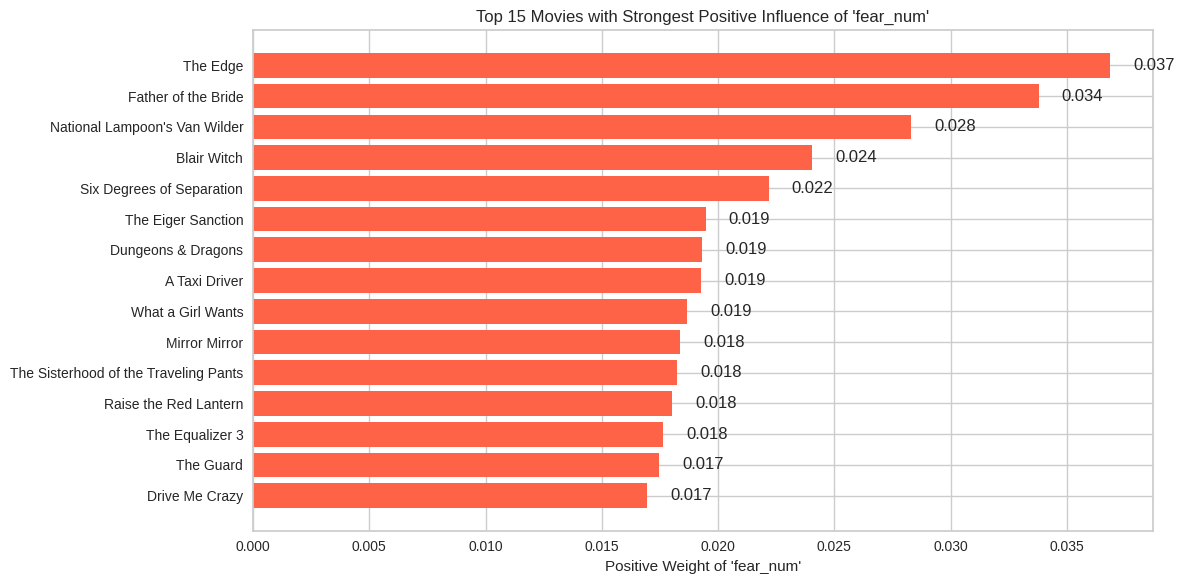

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

random_indices = random.sample(range(X_test_scaled.shape[0]), 500)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


fear_positive_movies = []


for idx in random_indices:
    instance = X_test_scaled[idx]


    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )


    for feat_name, weight in exp.as_list():
        if "Fear_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            fear_positive_movies.append({
                'title': title,
                'fear_weight': weight
            })
            break

fear_positive_movies.sort(key=lambda x: x['fear_weight'], reverse=True)


top_n = 15
top_movies = fear_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['fear_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'fear_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'fear_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

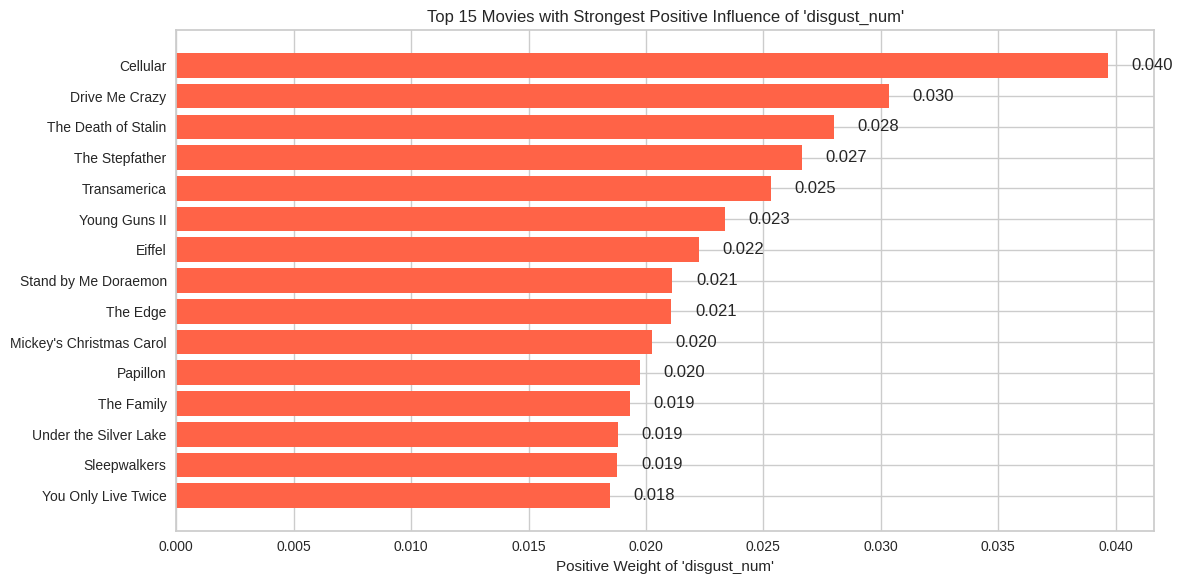

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer


random_indices = random.sample(range(X_test_scaled.shape[0]), 500)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


disgust_positive_movies = []


for idx in random_indices:
    instance = X_test_scaled[idx]

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    for feat_name, weight in exp.as_list():
        if "Disgust_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            disgust_positive_movies.append({
                'title': title,
                'disgust_weight': weight,
            })
            break

disgust_positive_movies.sort(key=lambda x: x['disgust_weight'], reverse=True)

top_n = 15
top_movies = disgust_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['disgust_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'disgust_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'disgust_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

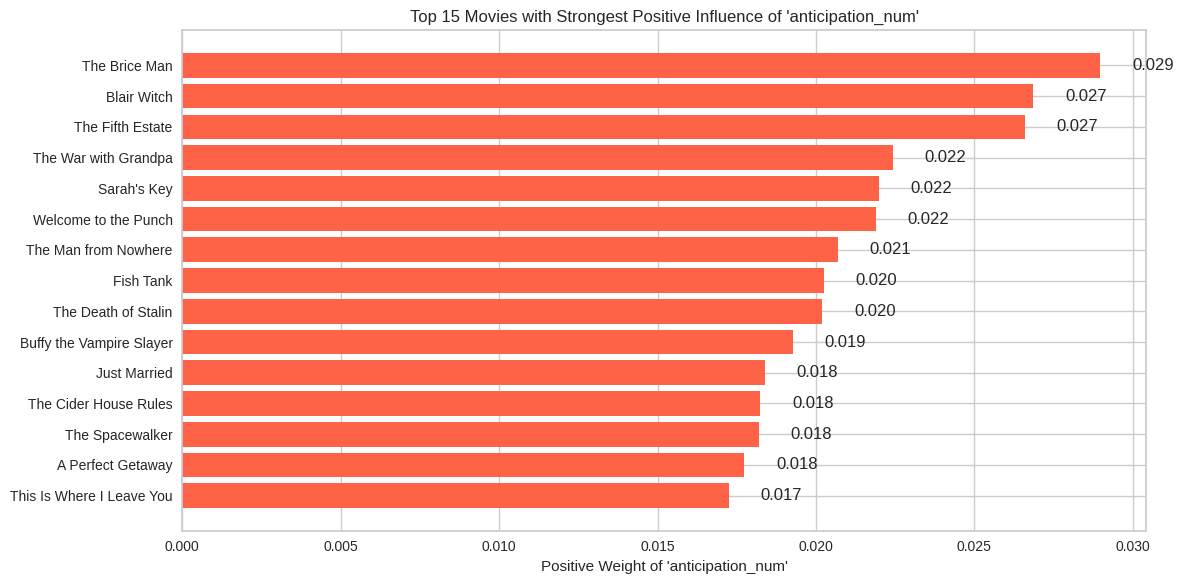

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer


anticipation_indices = random.sample(range(X_test_scaled.shape[0]), 500)


explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


anticipation_positive_movies = []


for idx in random_indices:
    instance = X_test_scaled[idx]


    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )


    for feat_name, weight in exp.as_list():
        if "Anticipation_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            anticipation_positive_movies.append({
                'title': title,
                'anticipation_weight': weight
            })
            break

anticipation_positive_movies.sort(key=lambda x: x['anticipation_weight'], reverse=True)


top_n = 15
top_movies = anticipation_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['anticipation_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'anticipation_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'anticipation_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

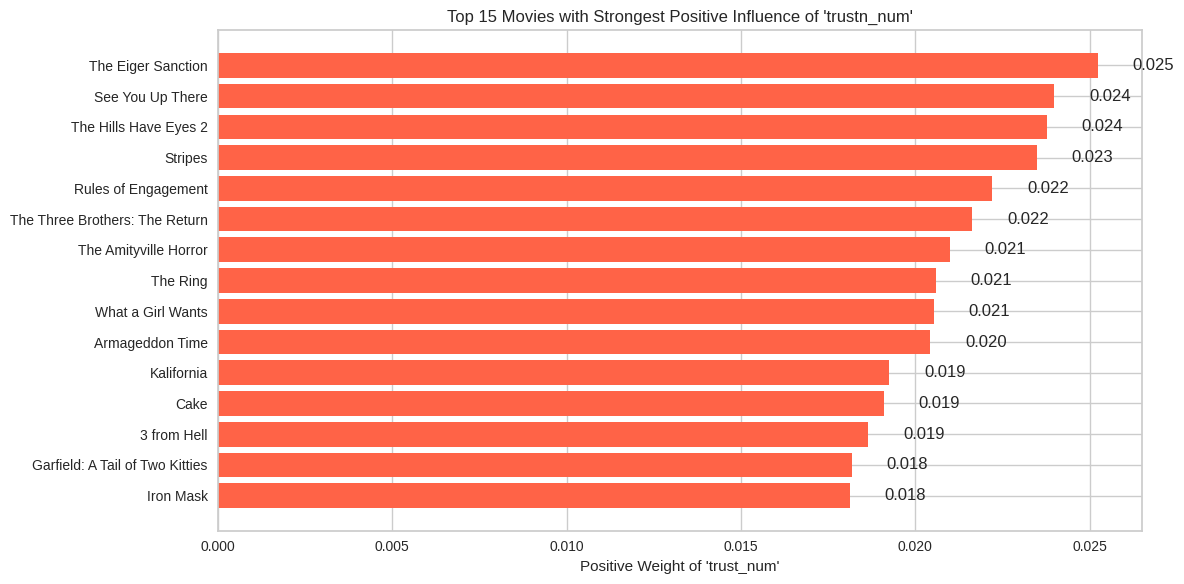

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

trust_indices = random.sample(range(X_test_scaled.shape[0]), 500)

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)

trust_positive_movies = []


for idx in random_indices:
    instance = X_test_scaled[idx]


    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )


    for feat_name, weight in exp.as_list():
        if "Trust_num" in feat_name and weight > 0:
            title = df_cleaned.loc[y_test.index[idx]]['title']
            trust_positive_movies.append({
                'title': title,
                'trust_weight': weight
            })
            break

trust_positive_movies.sort(key=lambda x: x['trust_weight'], reverse=True)


top_n = 15
top_movies = trust_positive_movies[:top_n]

plt.figure(figsize=(12, 6))
titles = [m['title'] for m in top_movies]
weights = [m['trust_weight'] for m in top_movies]

bars = plt.barh(titles, weights, color='tomato')
plt.xlabel("Positive Weight of 'trust_num'")
plt.title(f"Top {top_n} Movies with Strongest Positive Influence of 'trustn_num'")
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

predicted_revenues = model.predict(X_test_scaled)

top_n = 10
top_indices = np.argsort(predicted_revenues)[-top_n:][::-1]

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)


for i, idx in enumerate(top_indices, 1):
    instance = X_test_scaled[idx]
    predicted = predicted_revenues[idx]
    title = df_cleaned.loc[y_test.index[idx]]['title']

    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict,
        num_features=len(features)
    )

    print(f"{i}. {title}")
    print(f" Predicted Revenue: {predicted:.2f}")
    print(f" Feature Contributions (via LIME):")

    for feat_name, weight in exp.as_list():
        print(f"     {feat_name}: {weight:.3f}")

    print("-" * 60)


  Топ-10 фильмов с наибольшими предсказанными кассовыми сборами:

1. RED
     Predicted Revenue: 1.73
     Feature Contributions (via LIME):
     vote_count > 0.17: 0.525
     budget (100 mil) > 0.53: 0.345
     popularity > 0.13: 0.112
     genre_Family <= -0.32: -0.075
     -0.76 < genre_Comedy <= 1.31: 0.044
     genre_TV Movie <= -0.02: -0.040
     genre_Western <= -0.13: 0.032
     0.08 < release_year <= 0.25: -0.025
     Topic_10 > -0.38: 0.021
     0.02 < vote_average <= 0.69: -0.016
     genre_Adventure > -0.43: 0.013
     genre_Mystery <= -0.34: -0.011
     -0.68 < Anger_num <= -0.08: -0.011
     -0.02 < Trust_num <= 1.11: -0.011
     genre_Animation <= -0.22: -0.011
     genre_Science Fiction <= -0.34: 0.010
     Topic_8 > -0.45: 0.010
     Fear_num > 0.76: 0.009
     genre_Music <= -0.18: 0.009
     genre_Action > -0.54: -0.009
     Topic_4 <= -0.45: 0.009
     genre_History <= -0.25: 0.009
     genre_War <= -0.19: -0.008
     Sadness_num <= -0.78: 0.007
     Topic_1 <= -0.

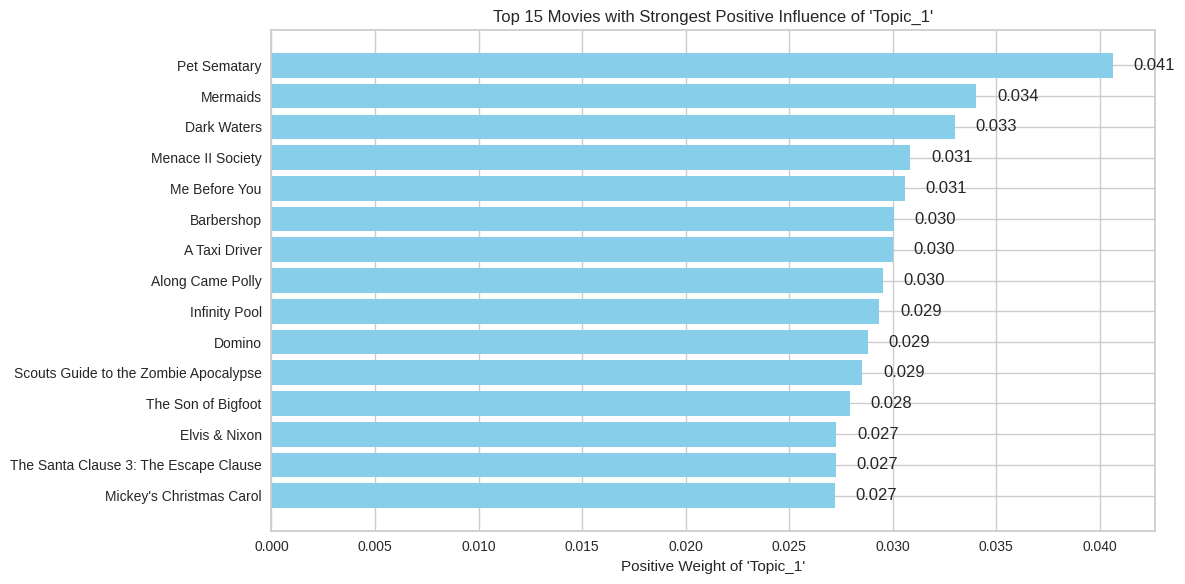

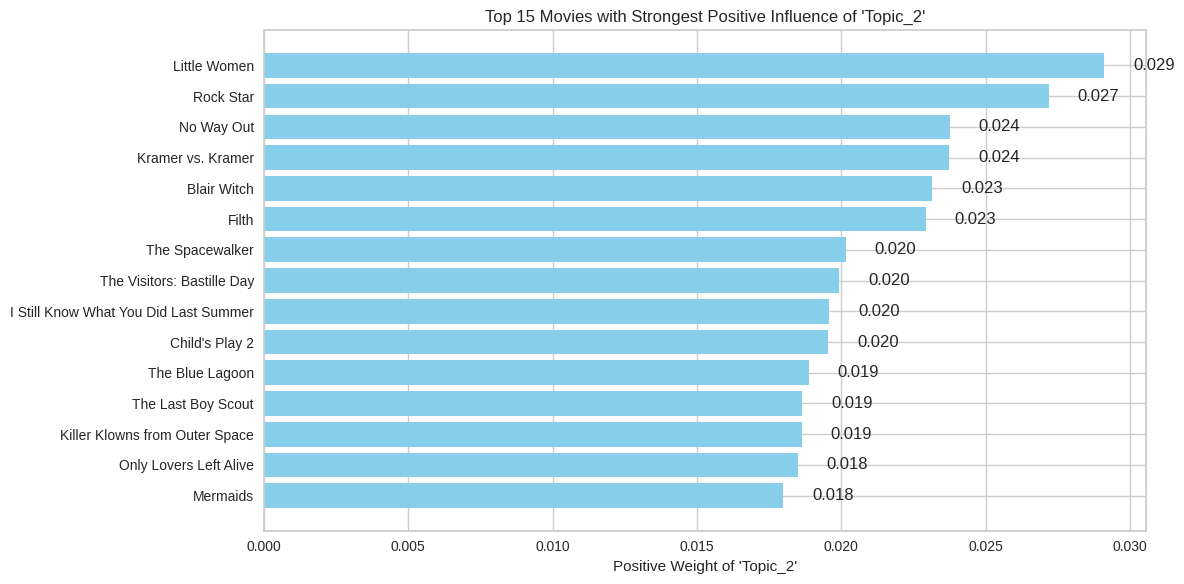

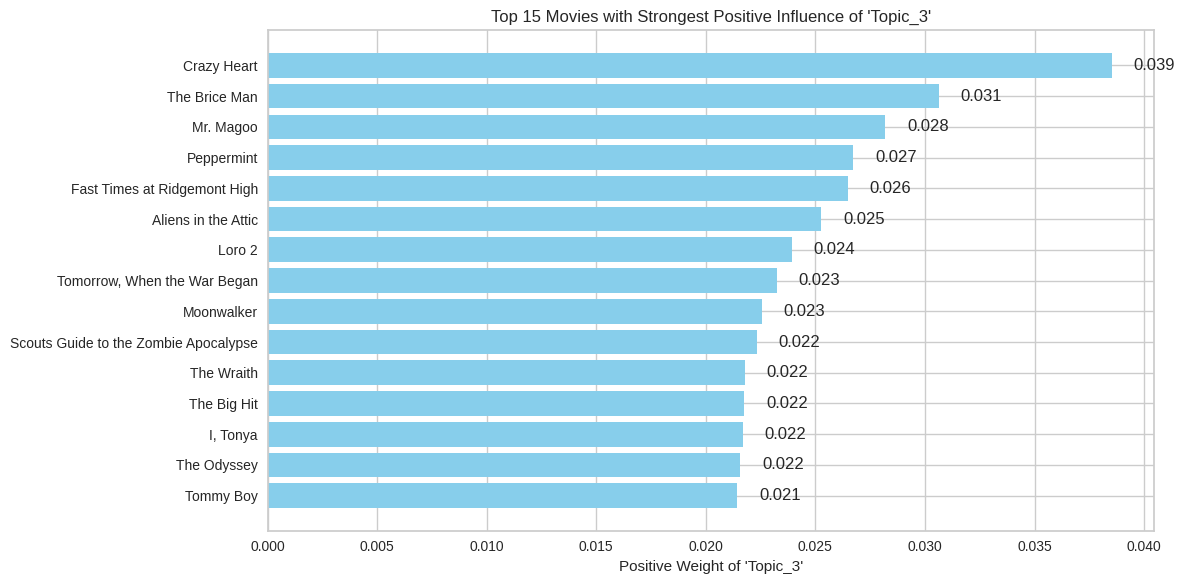

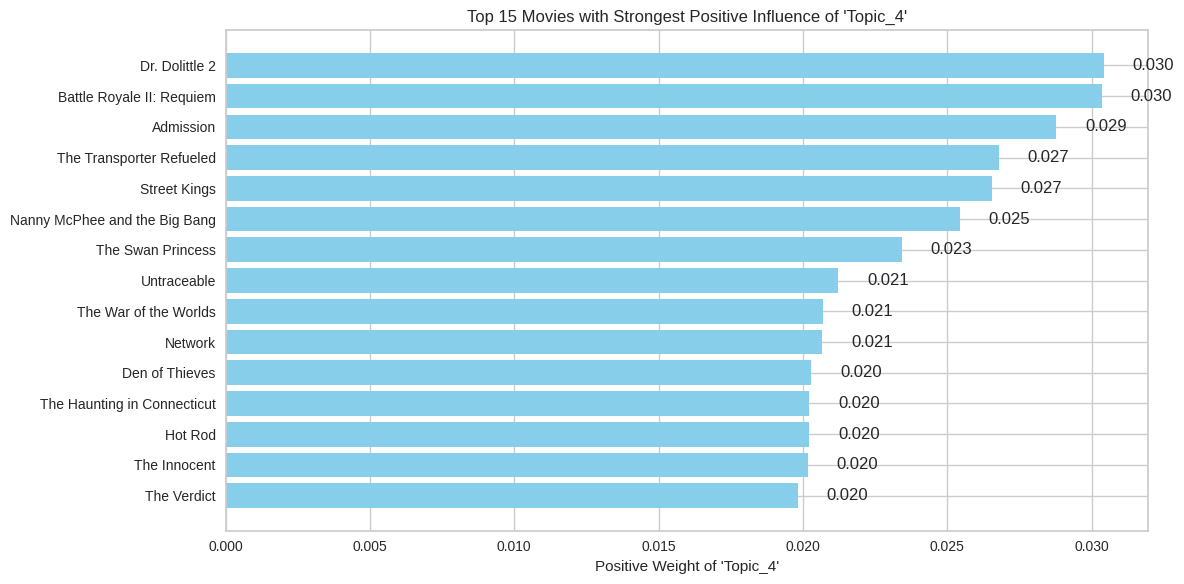

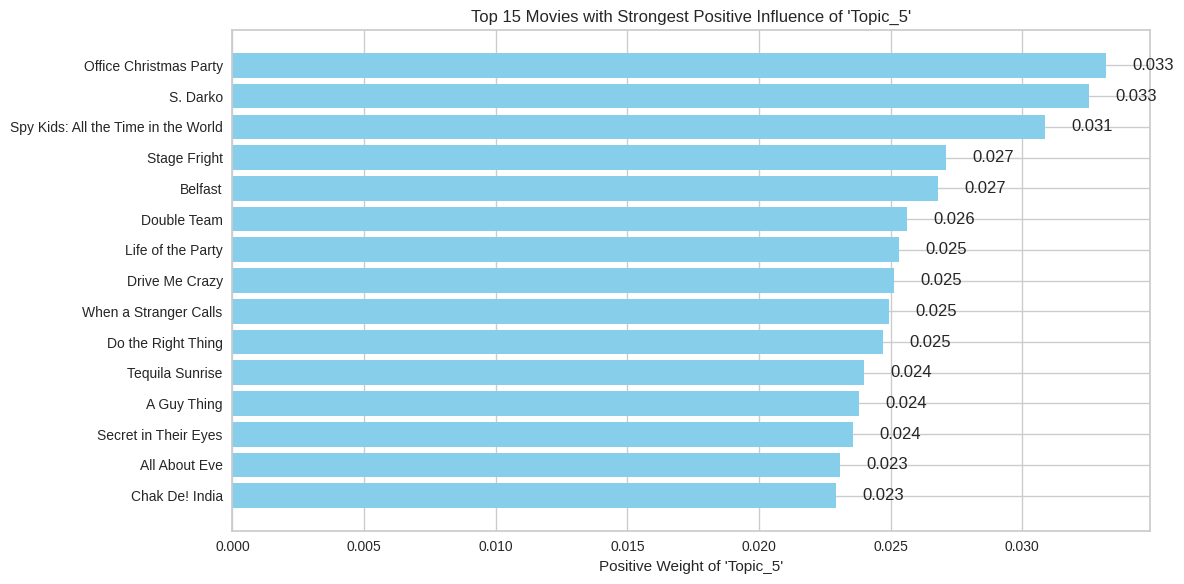

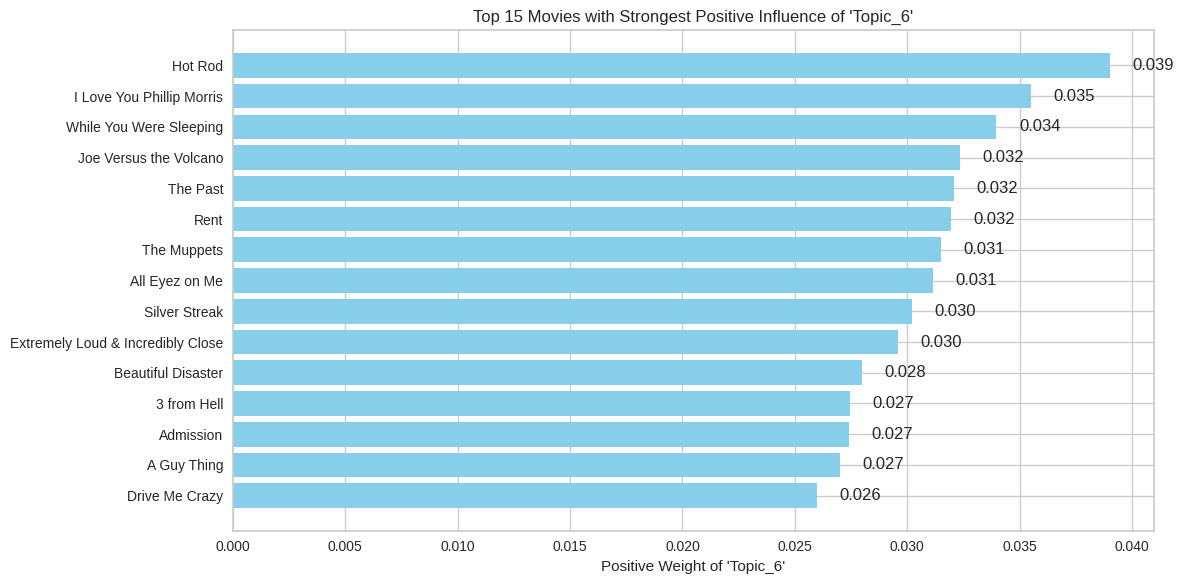

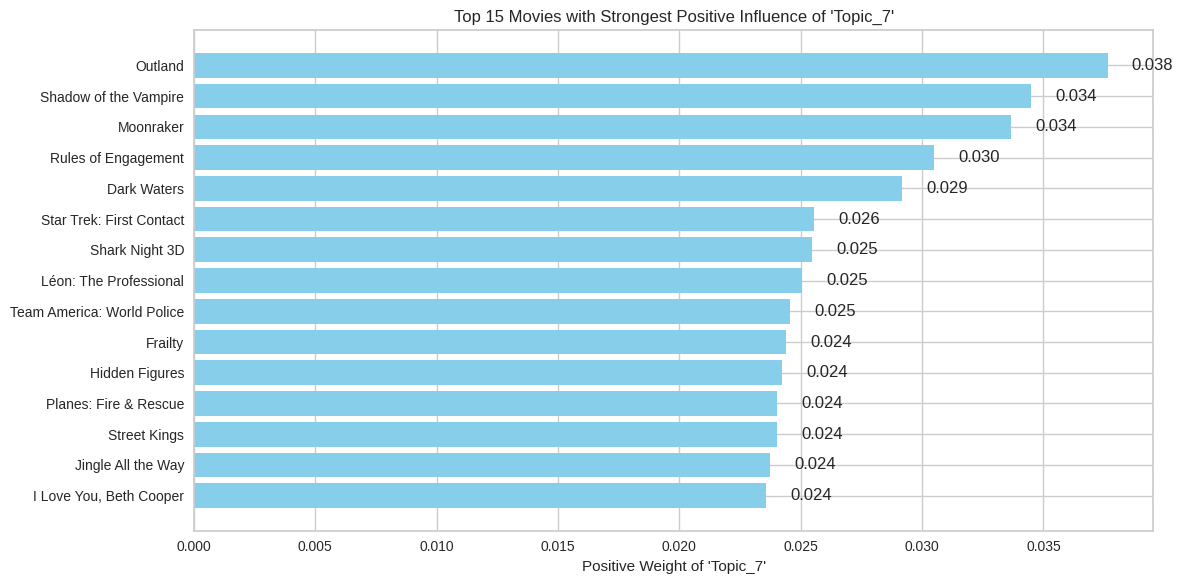

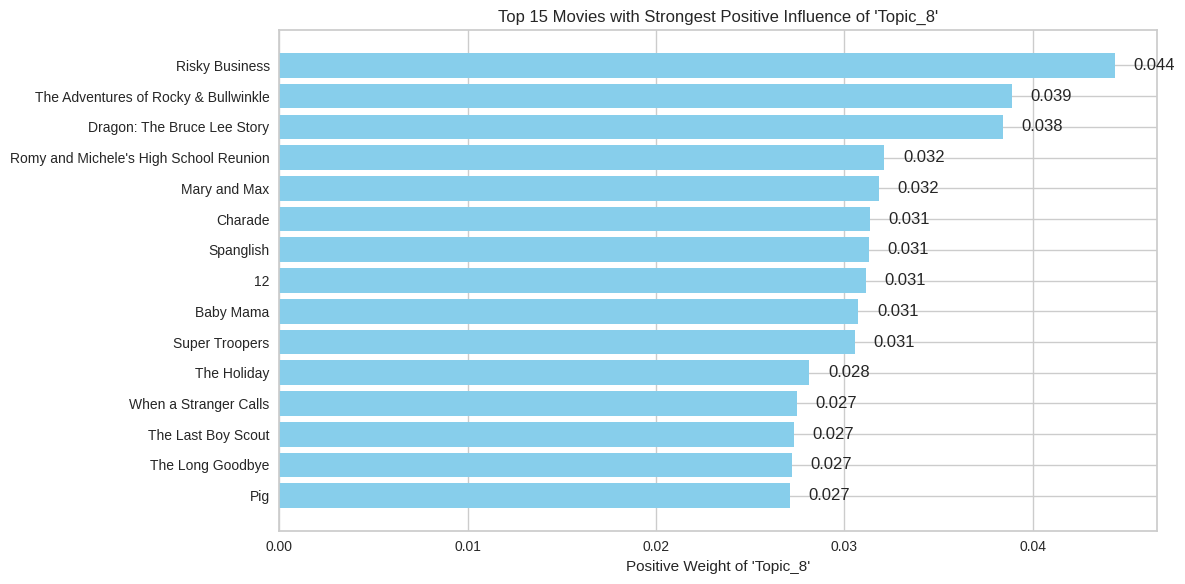

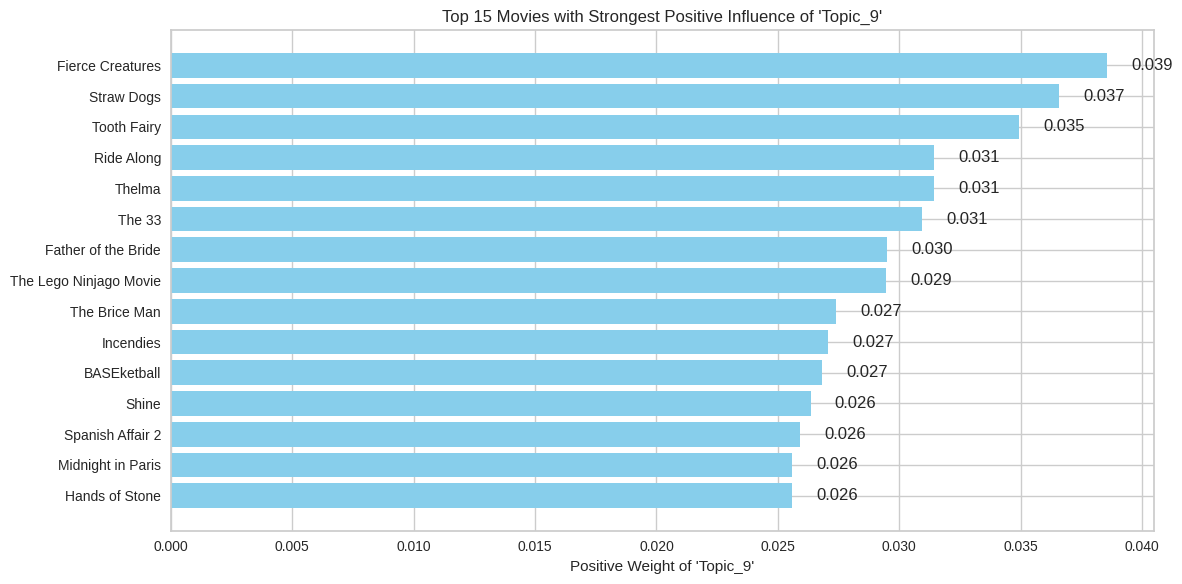

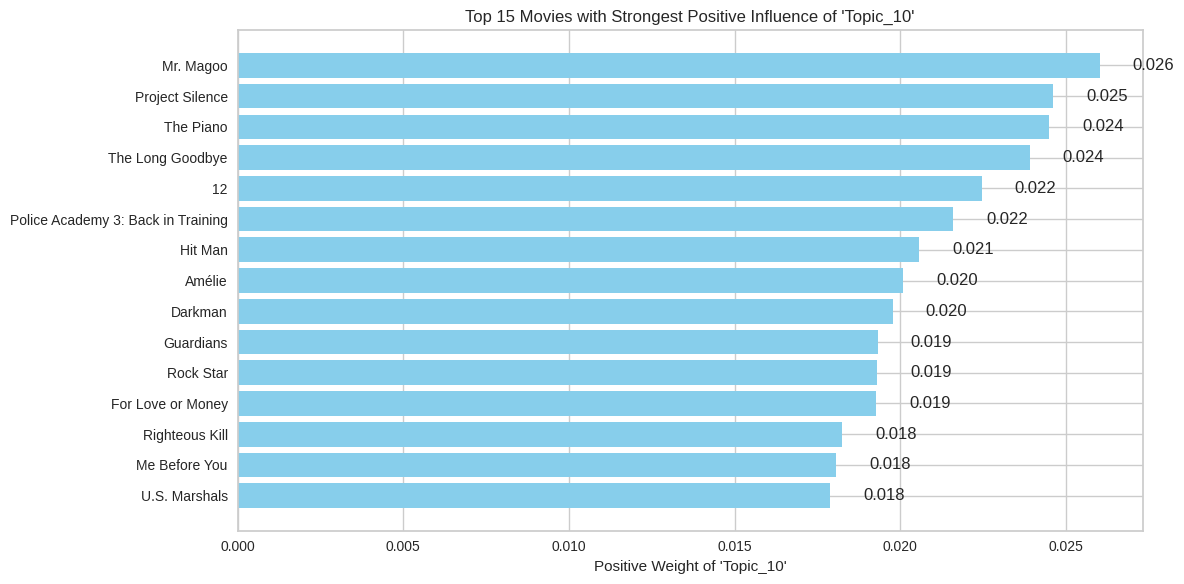

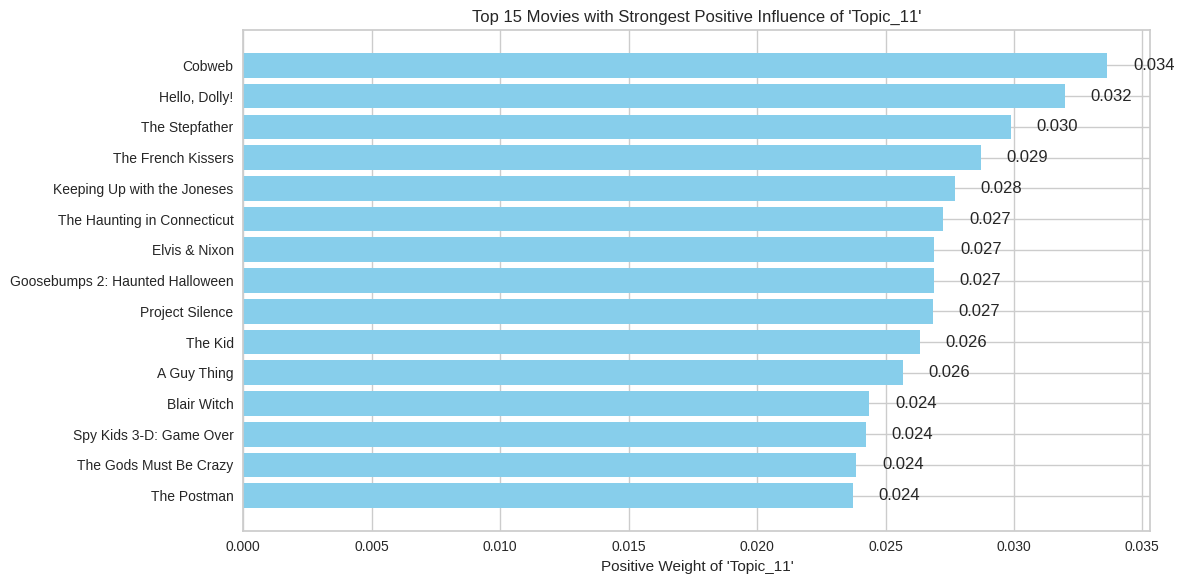

In [ ]:
import random
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

random_indices = random.sample(range(X_test_scaled.shape[0]), 550)


topic_features = [
    'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
    'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11'
]

explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    mode='regression',
    discretize_continuous=True
)

for topic in topic_features:
    influential_movies = []

    for idx in random_indices:
        instance = X_test_scaled[idx]
        exp = explainer.explain_instance(
            data_row=instance,
            predict_fn=model.predict,
            num_features=len(features)
        )

        for feat_name, weight in exp.as_list():
            if topic in feat_name and weight > 0:
                title = df_cleaned.loc[y_test.index[idx]]['title']
                influential_movies.append({
                    'title': title,
                    'weight': weight
                })
                break

    influential_movies.sort(key=lambda x: x['weight'], reverse=True)
    top_n = 15
    top_movies = influential_movies[:top_n]

    if top_movies:
        plt.figure(figsize=(12, 6))
        titles = [m['title'] for m in top_movies]
        weights = [m['weight'] for m in top_movies]

        bars = plt.barh(titles, weights, color='skyblue')
        plt.xlabel(f"Positive Weight of '{topic}'")
        plt.title(f"Top {top_n} Movies with Strongest Positive Influence of '{topic}'")
        plt.gca().invert_yaxis()

        for bar in bars:
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center')

        plt.tight_layout()
        plt.show()
    else:
        print(f"No strong positive influence found for {topic}")
